In [1]:
import time
import os
import pickle
import matplotlib.pyplot as plt
plt.ioff()
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Set random seed
np.random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your file
data = pd.read_csv('/content/drive/MyDrive/CLPS 1291/Copy of hals_biomarker_ld_07dec23 - Cols Deleted and Preprocessed - Empty items filled with average.csv')

trait_names = list(data.columns)
trait_data = data.iloc[0:].values

print(trait_names)

['Family_History_AD_1', 'Type_of_Schools_1', 'Type_of_Schools_1a', 'Type_of_Schools_2', 'Lifetime_Work_2', 'Background_1', 'Background_1_1_TEXT', 'SES_4', 'Tobacco_1a_35', 'Tobacco_1_25', 'Tobacco_1_50', 'Weight', 'Height', 'Waist', 'Hip', 'HVLT1C60', 'HVLT2C60', 'HVLT3C60', 'HVLTDTTP60', 'HVLTDSRFP60', 'HVLTDSUFP60', 'HVLTDTFP60', 'HVLTDRT_RT_2_1', 'CTSCORES_1_2', 'CTSCORES_2_2', 'StroopIT', 'WAIS_R_values_1_2', 'WAIS_R_values_2_2', 'WAIS_R_values_3_2', 'WAIS_R_values_4_2', 'WAIS_R_values_5_2', 'WRAT_Reading_1_2', 'WMSRAW_1_3', 'WMSRAW_2_3', 'BNT_TotalScore', 'Sleep_4', 'Cancer_1', 'Ab40', 'Ab42', 'NFL', 'GFAP', 'pTau181', 'pTau231', 'pTau217', 'DEMO0D', 'AGE7', 'C31', 'ged', 'LDHEINDEL3', 'white', 'sex', 'SH1E2R', 'fsiq', 'rstand', 'sstand', 'astand', 'viq', 'piq', 'infos', 'vocabs', 'dspans', 'parrs', 'bdesns', 'codes', 'VIQ35', 'COMPS35', 'VOCS35', 'PARRS35', 'BDS35', 'fastc', 'lmimmtot', 'bntspon', 'bnttotal', 'DEMO6I', 'INTVW_AGE', 'comps', 'DSPANS35', 'lmdeltot', 'INFS35', 'strp

In [ ]:
data.shape

(113, 195)

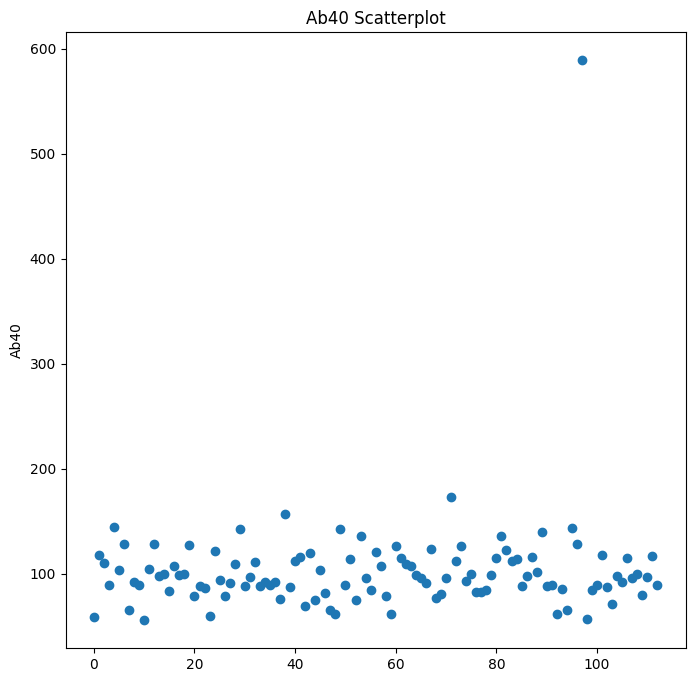

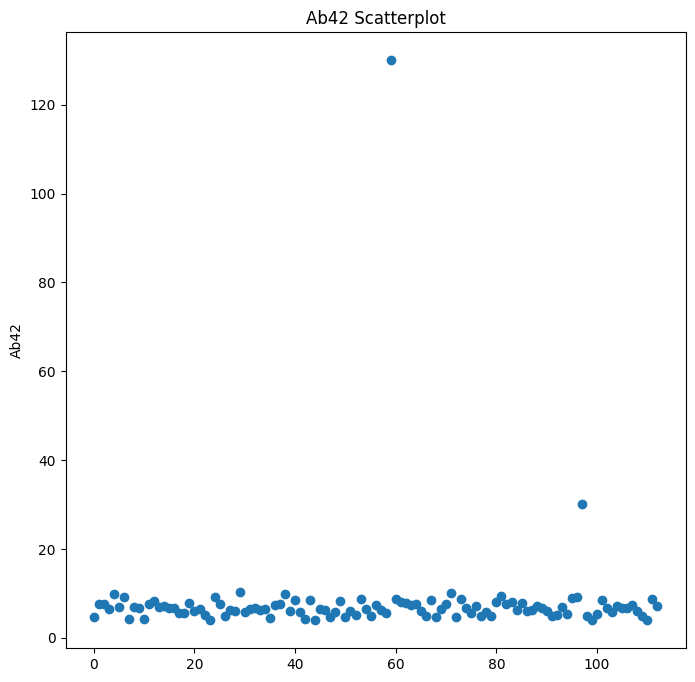

In [4]:
# Exploring dependent variables y
# Ab40 *observe outlier at index 97
plt.scatter(np.arange(113), data["Ab40"])
plt.title("Ab40 Scatterplot")
plt.ylabel("Ab40")
plt.show()

# Ab42 *observe outlier at index 59, 97
plt.scatter(np.arange(113), data["Ab42"])
plt.title("Ab42 Scatterplot")
plt.ylabel("Ab42")
plt.show()

### y = Ab40 with selected variables

In [5]:
# split training tesing data
# family history, total time nor working/in school, household earning
x_var = ["Family_History_AD_1", "SES_4", "Weight", "Height", "Waist", "Hip"]
y_var = ["Ab40", "Ab42"]
X = data[x_var]
X["Family_History_AD_1"] = X["Family_History_AD_1"].astype('category')
y1 = data[y_var[0]]
y1 = y1.drop(97)
X = X.drop([97])
y2 = data[y_var[1]]
y2 = y2.drop([59, 97])
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2)

<ipython-input-5-1068d3e7e308>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Family_History_AD_1"] = X["Family_History_AD_1"].astype('category')


In [6]:
MSE_train = np.empty(5)
MSE_test = np.empty(5)

# train decision tree with different depth
for i in np.arange(5):
  rgr = tree.DecisionTreeRegressor(max_depth=i+1)
  rgr = rgr.fit(X_train, y_train)
  # Predict
  y_pre_test = rgr.predict(X_test)
  y_pre_train = rgr.predict(X_train)

  MSE_test[i] = mean_squared_error(y_test, y_pre_test)
  MSE_train[i] = mean_squared_error(y_train, y_pre_train)

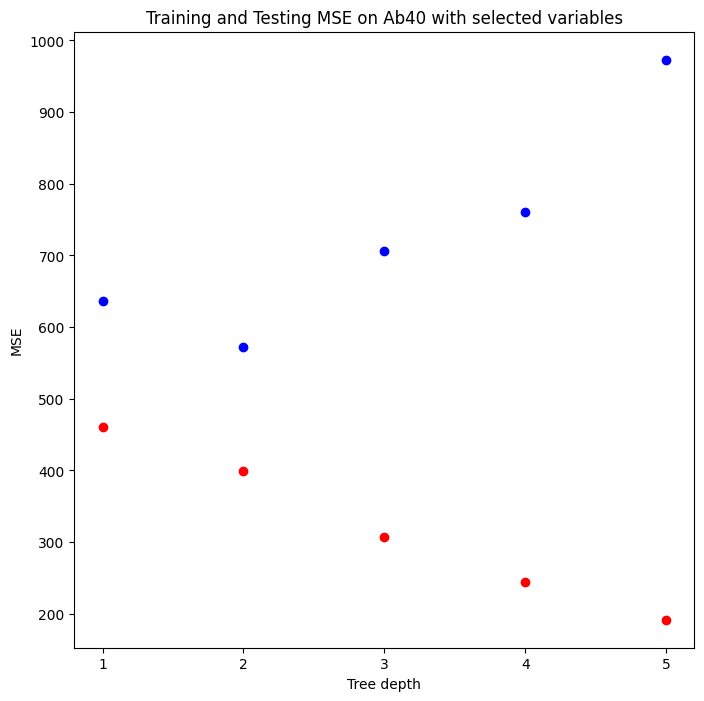

In [7]:
plt.scatter(np.arange(5)+1, MSE_train, c='red')
plt.scatter(np.arange(5)+1, MSE_test, c='blue')
plt.xticks(np.arange(5)+1)
plt.xlabel('Tree depth')
plt.ylabel('MSE')
plt.title('Training and Testing MSE on Ab40 with selected variables')
plt.show()

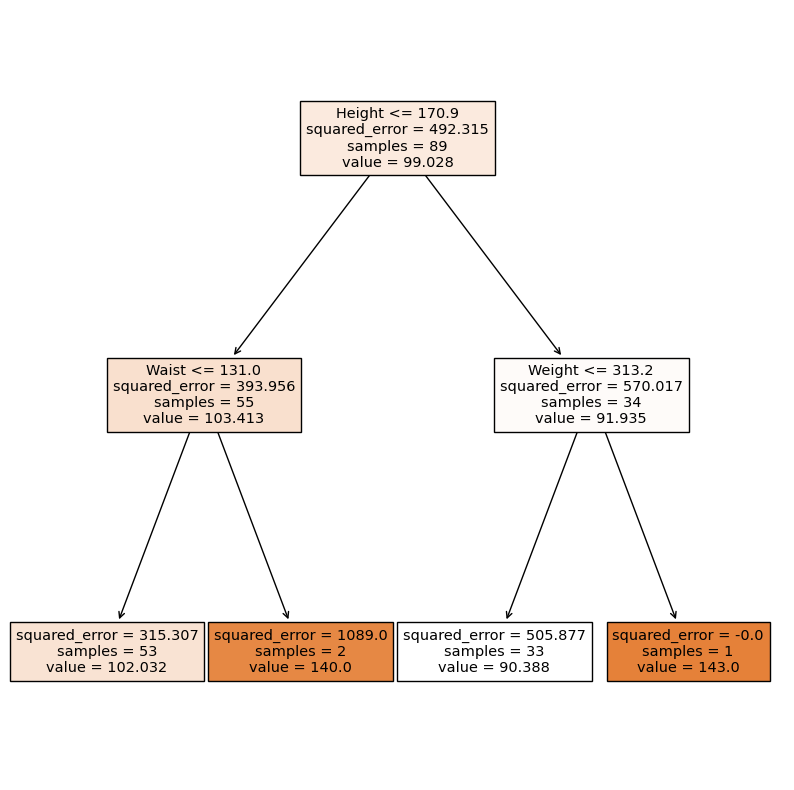

In [8]:
# Plot decision tree - best depth=2
rgr = tree.DecisionTreeRegressor(max_depth=2)
rgr = rgr.fit(X_train, y_train)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(rgr,
                   feature_names=x_var,
                   filled=True)
plt.show()

### y=Ab42 with selected variables

In [9]:
# split training tesing data
# family history, total time nor working/in school, household earning
x_var = ["Family_History_AD_1", "SES_4", "Weight", "Height", "Waist", "Hip"]
y_var = ["Ab40", "Ab42"]
X = data[x_var]
X["Family_History_AD_1"] = X["Family_History_AD_1"].astype('category')
y1 = data[y_var[0]]
y1 = y1.drop(97)
X = X.drop([59, 97])
y2 = data[y_var[1]]
y2 = y2.drop([59, 97])
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2)

<ipython-input-9-b9679696cb15>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Family_History_AD_1"] = X["Family_History_AD_1"].astype('category')


In [10]:
MSE_train = np.empty(5)
MSE_test = np.empty(5)

# train decision tree with different depth
for i in np.arange(5):
  rgr = tree.DecisionTreeRegressor(max_depth=i+1)
  rgr = rgr.fit(X_train, y_train)
  # Predict
  y_pre_test = rgr.predict(X_test)
  y_pre_train = rgr.predict(X_train)

  MSE_test[i] = mean_squared_error(y_test, y_pre_test)
  MSE_train[i] = mean_squared_error(y_train, y_pre_train)

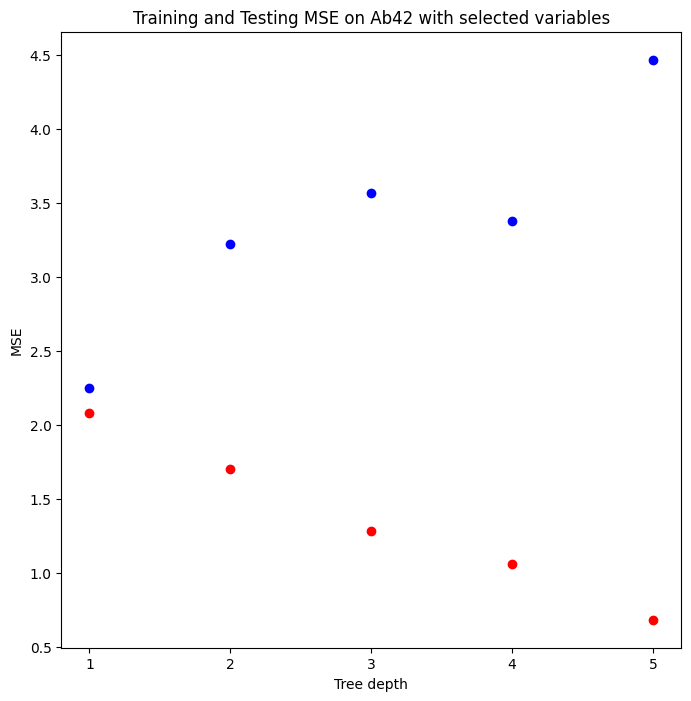

In [11]:
plt.scatter(np.arange(5)+1, MSE_train, c='red')
plt.scatter(np.arange(5)+1, MSE_test, c='blue')
plt.xticks(np.arange(5)+1)
plt.xlabel('Tree depth')
plt.ylabel('MSE')
plt.title('Training and Testing MSE on Ab42 with selected variables')
plt.show()

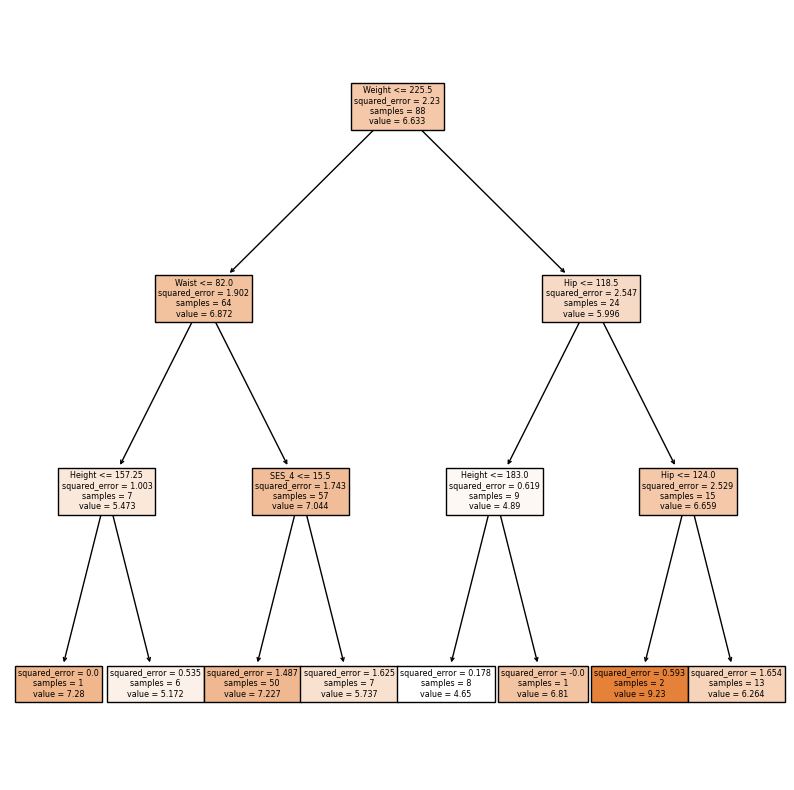

In [12]:
# Plot decision tree - best depth=3
rgr = tree.DecisionTreeRegressor(max_depth=3)
rgr = rgr.fit(X_train, y_train)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(rgr,
                   feature_names=x_var,
                   filled=True)
plt.show()

### y = Ab40 with all variables

In [13]:
# split training tesing data
# family history, total time nor working/in school, household earning
dependent_variables = ["Ab40",	"Ab42",	"NFL",	"GFAP",	"pTau181",	"pTau231",	"pTau217"]
X = data.drop(dependent_variables, axis = 1)
x_var = list(X.columns.values)
y_var = ["Ab40", "Ab42"]
y1 = data[y_var[0]]
y1 = y1.drop(97)
X = X.drop([97])
y2 = data[y_var[1]]
y2 = y2.drop([59, 97])
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2)

In [14]:
MSE_train = np.empty(10)
MSE_test = np.empty(10)

# train decision tree with different depth
for i in np.arange(10):
  rgr = tree.DecisionTreeRegressor(max_depth=i+1)
  rgr = rgr.fit(X_train, y_train)
  # Predict
  y_pre_test = rgr.predict(X_test)
  y_pre_train = rgr.predict(X_train)

  MSE_test[i] = mean_squared_error(y_test, y_pre_test)
  MSE_train[i] = mean_squared_error(y_train, y_pre_train)

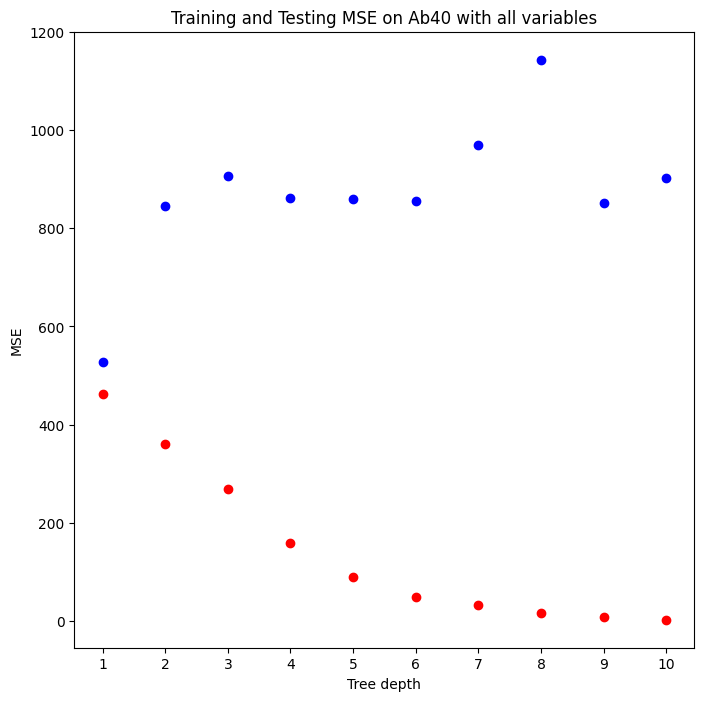

In [15]:
plt.scatter(np.arange(10)+1, MSE_train, c='red')
plt.scatter(np.arange(10)+1, MSE_test, c='blue')
plt.xticks(np.arange(10)+1)
plt.xlabel('Tree depth')
plt.ylabel('MSE')
plt.title('Training and Testing MSE on Ab40 with all variables')
plt.show()

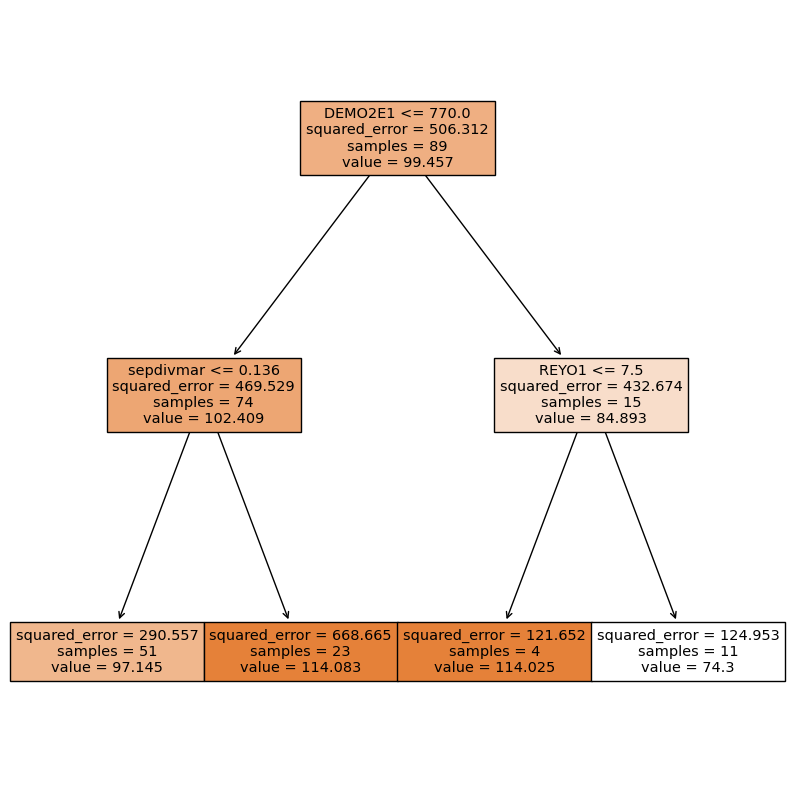

In [16]:
# Plot decision tree - best depth=2
rgr = tree.DecisionTreeRegressor(max_depth=2)
rgr = rgr.fit(X_train, y_train)
fig = plt.figure(figsize=(10, 10))
_ = tree.plot_tree(rgr,
                   feature_names=x_var,
                   filled=True)
plt.show()

### y = Ab42 with all variables

In [17]:
# split training tesing data
# family history, total time nor working/in school, household earning
dependent_variables = ["Ab40",	"Ab42",	"NFL",	"GFAP",	"pTau181",	"pTau231",	"pTau217"]
X = data.drop(dependent_variables, axis = 1)
x_var = list(X.columns.values)
y_var = ["Ab40", "Ab42"]
y1 = data[y_var[0]]
y1 = y1.drop(97)
X = X.drop([59, 97])
y2 = data[y_var[1]]
y2 = y2.drop([59, 97])
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2)

In [18]:
MSE_train = np.empty(10)
MSE_test = np.empty(10)

# train decision tree with different depth
for i in np.arange(10):
  rgr = tree.DecisionTreeRegressor(max_depth=i+1)
  rgr = rgr.fit(X_train, y_train)
  # Predict
  y_pre_test = rgr.predict(X_test)
  y_pre_train = rgr.predict(X_train)

  MSE_test[i] = mean_squared_error(y_test, y_pre_test)
  MSE_train[i] = mean_squared_error(y_train, y_pre_train)

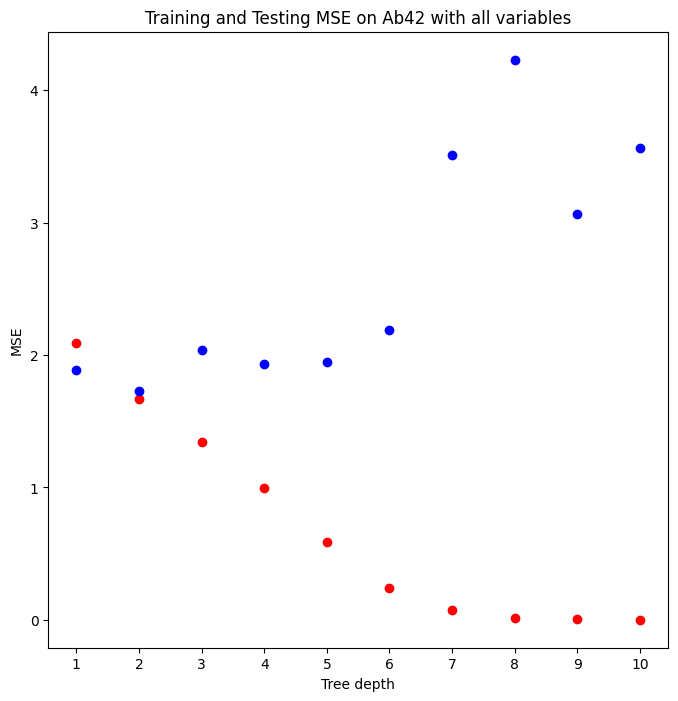

In [19]:
plt.scatter(np.arange(10)+1, MSE_train, c='red')
plt.scatter(np.arange(10)+1, MSE_test, c='blue')
plt.xticks(np.arange(10)+1)
plt.xlabel('Tree depth')
plt.ylabel('MSE')
plt.title('Training and Testing MSE on Ab42 with all variables')
plt.show()

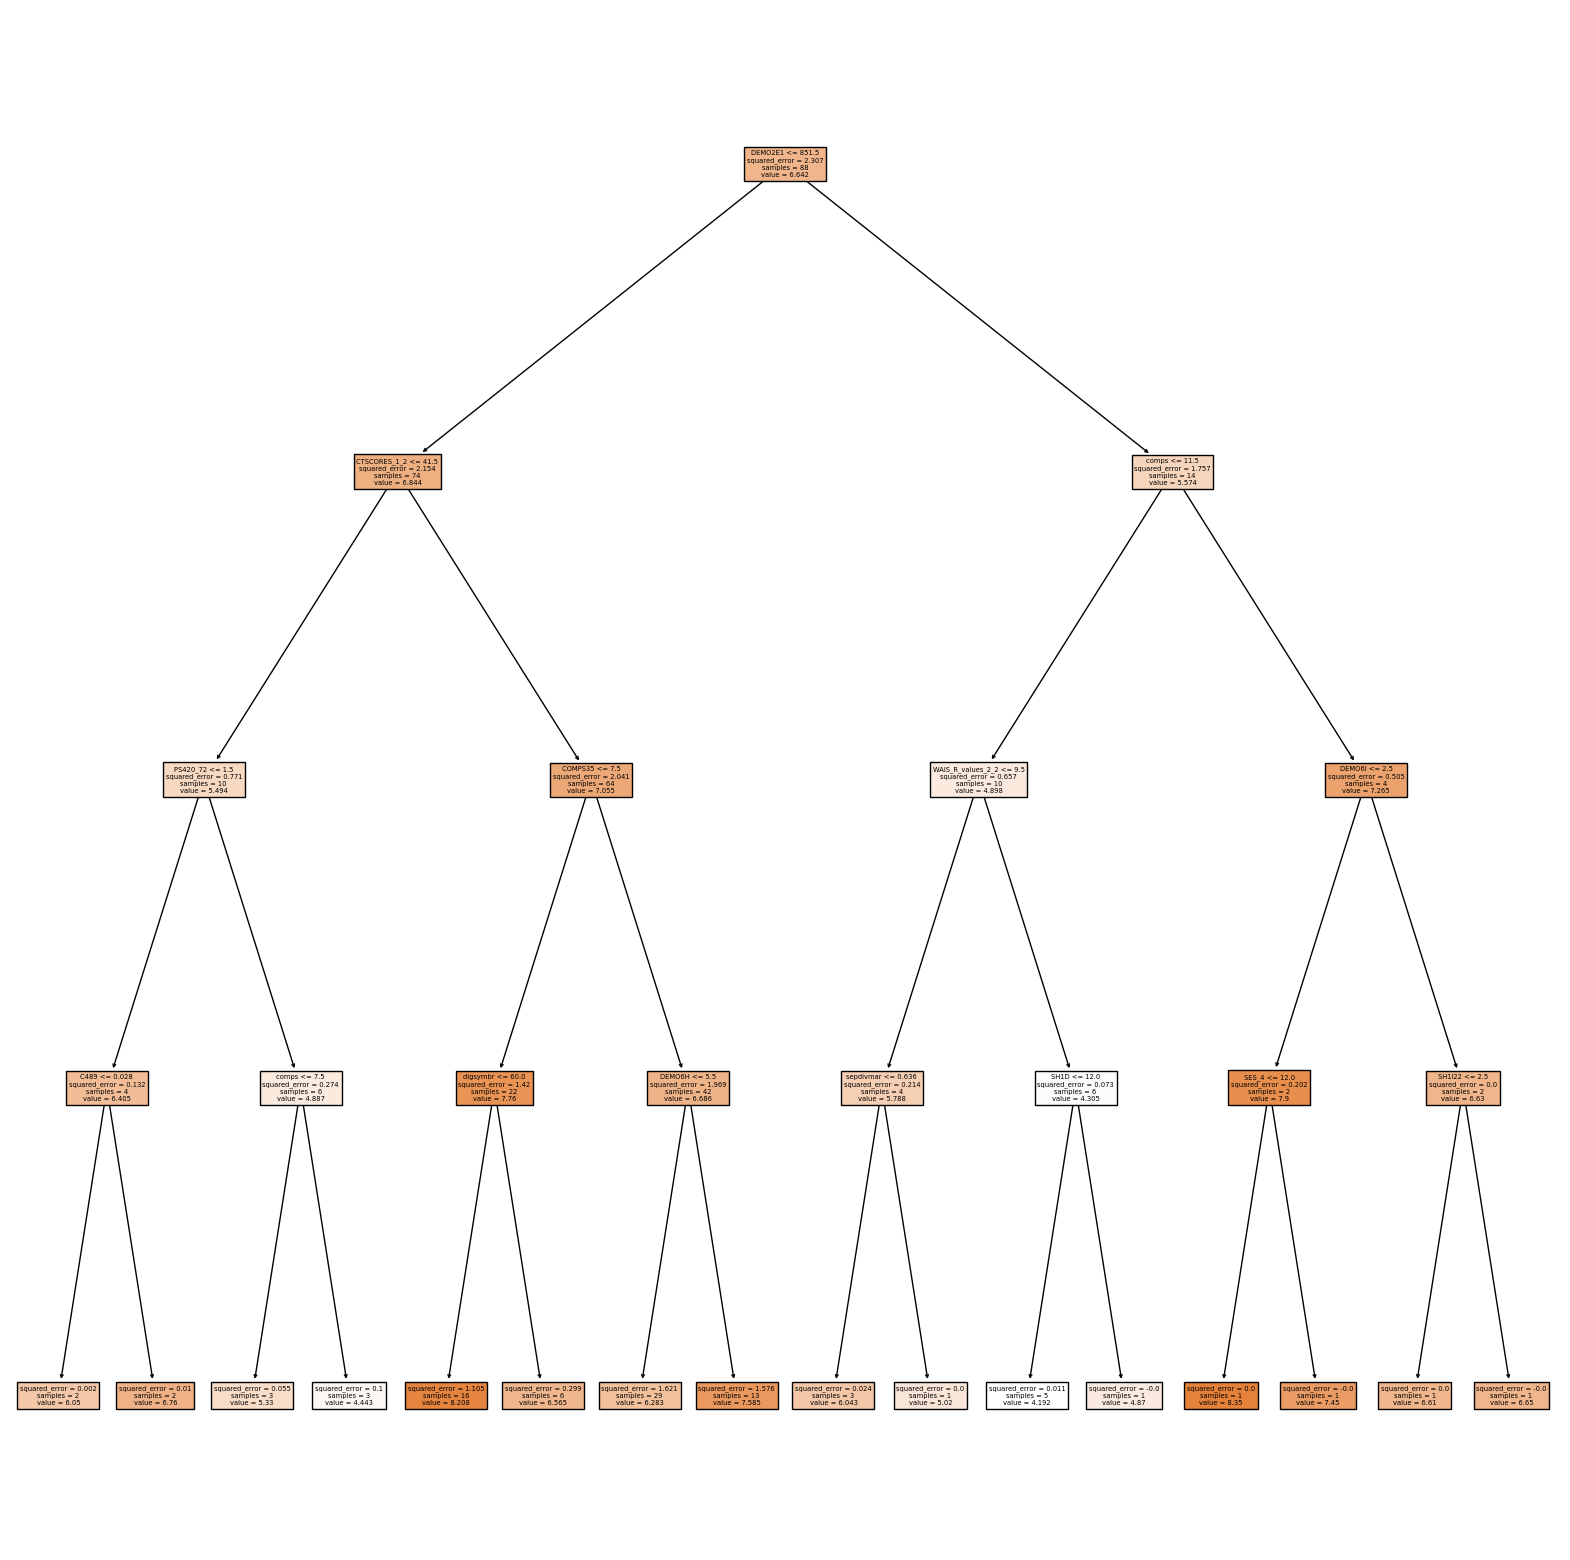

In [20]:
# Plot decision tree - best depth=4
rgr = tree.DecisionTreeRegressor(max_depth=4)
rgr = rgr.fit(X_train, y_train)
fig = plt.figure(figsize=(20, 20))
_ = tree.plot_tree(rgr,
                   feature_names=x_var,
                   filled=True)
plt.show()